---------------

**If any part of this notebook is used in your research, please cite with the reference found in** **[README.md](https://github.com/pysal/spaghetti#bibtex-citation).**


----------------

## Network-constrained spatial autocorrelation
### Performing and visualizing exploratory spatial data analysis

**Author: James D. Gaboardi** **<jgaboardi@gmail.com>**

**This notebook is an advanced walk-through for:**

1. Demonstrating spatial autocorrelation with `pysal/esda`
2. Calculating Moran's *I* on a segmented network
3. Visualizing spatial autocorrelation with `pysal/splot`

In [1]:
%load_ext watermark
%watermark

2020-05-01T09:42:54-04:00

CPython 3.7.3
IPython 7.10.2

compiler   : Clang 9.0.0 (tags/RELEASE_900/final)
system     : Darwin
release    : 19.4.0
machine    : x86_64
processor  : i386
CPU cores  : 4
interpreter: 64bit


In [2]:
import esda
import libpysal
import matplotlib
import matplotlib_scalebar
from matplotlib_scalebar.scalebar import ScaleBar
import numpy
import spaghetti
import splot

%matplotlib inline
%watermark -w
%watermark -iv

watermark 2.0.2
libpysal            4.2.2
matplotlib_scalebar 0.6.1
esda                2.2.1
splot               1.1.2
matplotlib          3.1.2
spaghetti           1.4.2.post2
numpy               1.18.1



In [3]:
try:
    from IPython.display import set_matplotlib_formats
    set_matplotlib_formats("retina")
except ImportError:
    pass

----------------

### Instantiating a `spaghetti.Network` object and a point pattern
#### Instantiate the network from a `.shp` file

In [4]:
ntw = spaghetti.Network(in_data=libpysal.examples.get_path("streets.shp"))
ntw

####  Extract network arcs as a `geopandas.GeoDataFrame`

In [5]:
_, arc_df = spaghetti.element_as_gdf(ntw, vertices=True, arcs=True)
arc_df.head()

,id,geometry,comp_label
0,"(0, 1)","LINESTRING (728368.048 877125.895, 728368.139 ...",0
1,"(0, 2)","LINESTRING (728368.048 877125.895, 728367.458 ...",0
2,"(1, 110)","LINESTRING (728368.139 877023.272, 728612.255 ...",0
3,"(1, 127)","LINESTRING (728368.139 877023.272, 727708.140 ...",0
4,"(1, 213)","LINESTRING (728368.139 877023.272, 728368.729 ...",0


#### Associate the network with a point pattern

In [6]:
pp_name = "crimes"
pp_shp = libpysal.examples.get_path("%s.shp" % pp_name)
ntw.snapobservations(pp_shp, pp_name, attribute=True)
ntw.pointpatterns

{'crimes': <spaghetti.network.PointPattern at 0x1273f2f98>}

####  Extract the crimes point pattern as a `geopandas.GeoDataFrame`

In [7]:
pp_df = spaghetti.element_as_gdf(ntw, pp_name=pp_name)
pp_df.head()

,id,geometry,comp_label
0,0,POINT (727913.000 875721.000),0
1,1,POINT (724812.000 875763.000),0
2,2,POINT (727391.000 875853.000),0
3,3,POINT (728017.000 875858.000),0
4,4,POINT (727525.000 875860.000),0


--------------------------

### 1. ESDA — Exploratory Spatial Data Analysis with [pysal/esda](https://esda.readthedocs.io/en/latest/)

In [8]:
def calc_moran(net, pp_name, w):
    """Calculate a Moran's I statistic."""
    # Compute the counts
    pointpat = net.pointpatterns[pp_name]
    counts = net.count_per_link(pointpat.obs_to_arc, graph=False)
    # Build the y vector
    arcs = w.neighbors.keys()
    y = [counts[a] if a in counts.keys() else 0. for i, a in enumerate(arcs)]
    # Moran's I
    moran = esda.moran.Moran(y, w, permutations=99)
    return moran, y

#### Moran's *I* using the network representation's *W*

In [9]:
moran_ntww, yaxis_ntww = calc_moran(ntw, pp_name, ntw.w_network)
moran_ntww.I

0.005192687496078421

#### Moran's *I* using the graph representation's *W*

In [10]:
moran_ntwg, yaxis_ntwg = calc_moran(ntw, pp_name, ntw.w_graph)
moran_ntwg.I

0.05223210335368553

**Interpretation:**

* **....**

--------------------------------

### 2. Moran's *I* on a segmented network
#### Moran's *I* on a network split into 200-meter segments

In [11]:
n200 = ntw.split_arcs(200.0)
n200

In [12]:
moran_n200, yaxis_n200 = calc_moran(n200, pp_name, n200.w_network)
moran_n200.I

-0.01764461487556588

#### Moran's *I* on a network split into 50-meter segments

In [13]:
n50 = ntw.split_arcs(50.0)
n50

In [14]:
moran_n50, yaxis_n50 = calc_moran(n50, pp_name, n50.w_network)
moran_n50.I

-0.012505858739644651

**Interpretation:**

* **....**

---------------------------

### 3. Visualizing ESDA with `splot`

In [15]:
from splot.esda import moran_scatterplot, lisa_cluster, plot_moran

#### Moran scatterplot

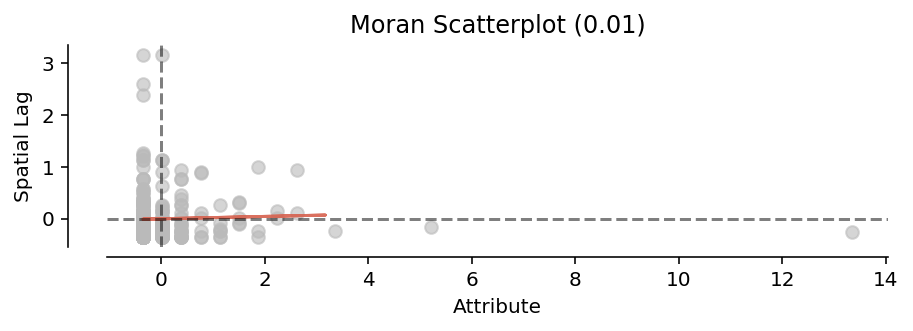

In [16]:
moran_scatterplot(moran_ntww, aspect_equal=True);

**Interpretation:**

* **....**

#### Reference distribution and Moran scatterplot

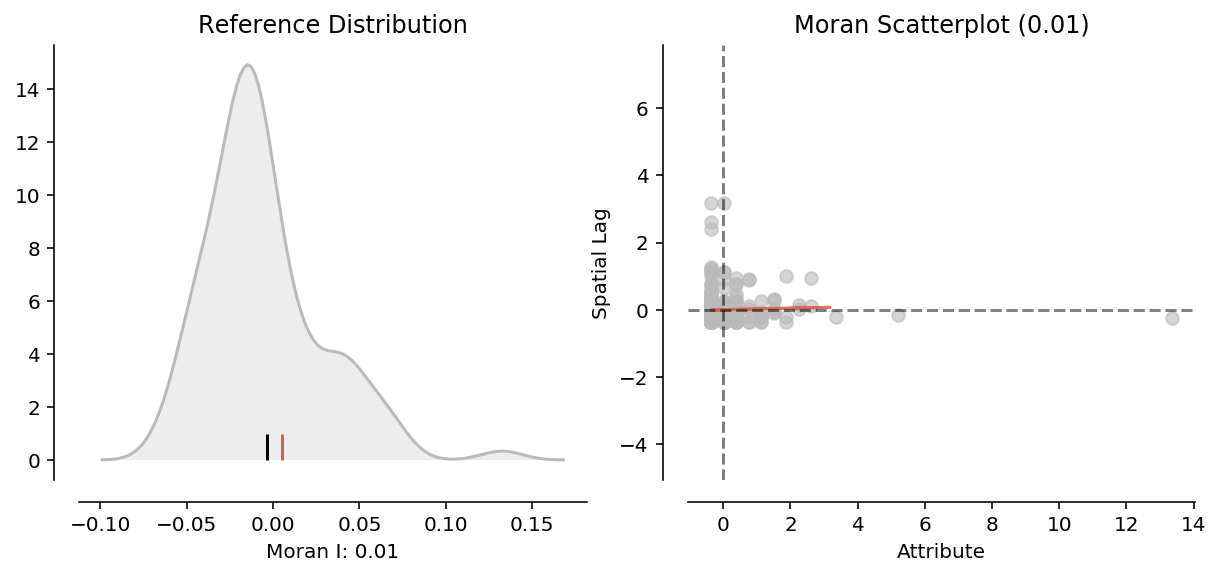

In [17]:
plot_moran(moran_ntww, zstandard=True, figsize=(10,4));

**Interpretation:**

* **....**

#### ...

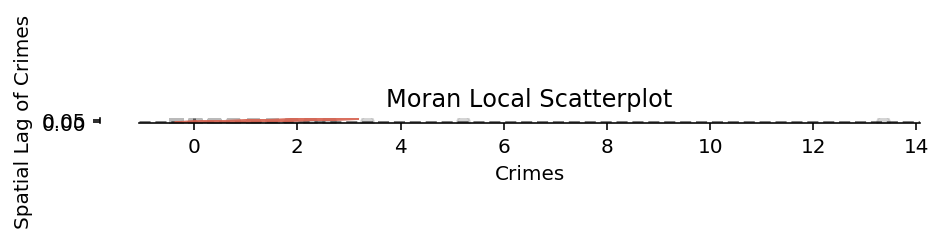

In [18]:
# calculate Moran_Local and plot
moran_loc_ntww = esda.moran.Moran_Local(yaxis_ntww, ntw.w_network)
fig, ax = moran_scatterplot(moran_loc_ntww)
ax.set_xlabel("Crimes")
ax.set_ylabel("Spatial Lag of Crimes");

**Interpretation:**

* **....**

#### ...

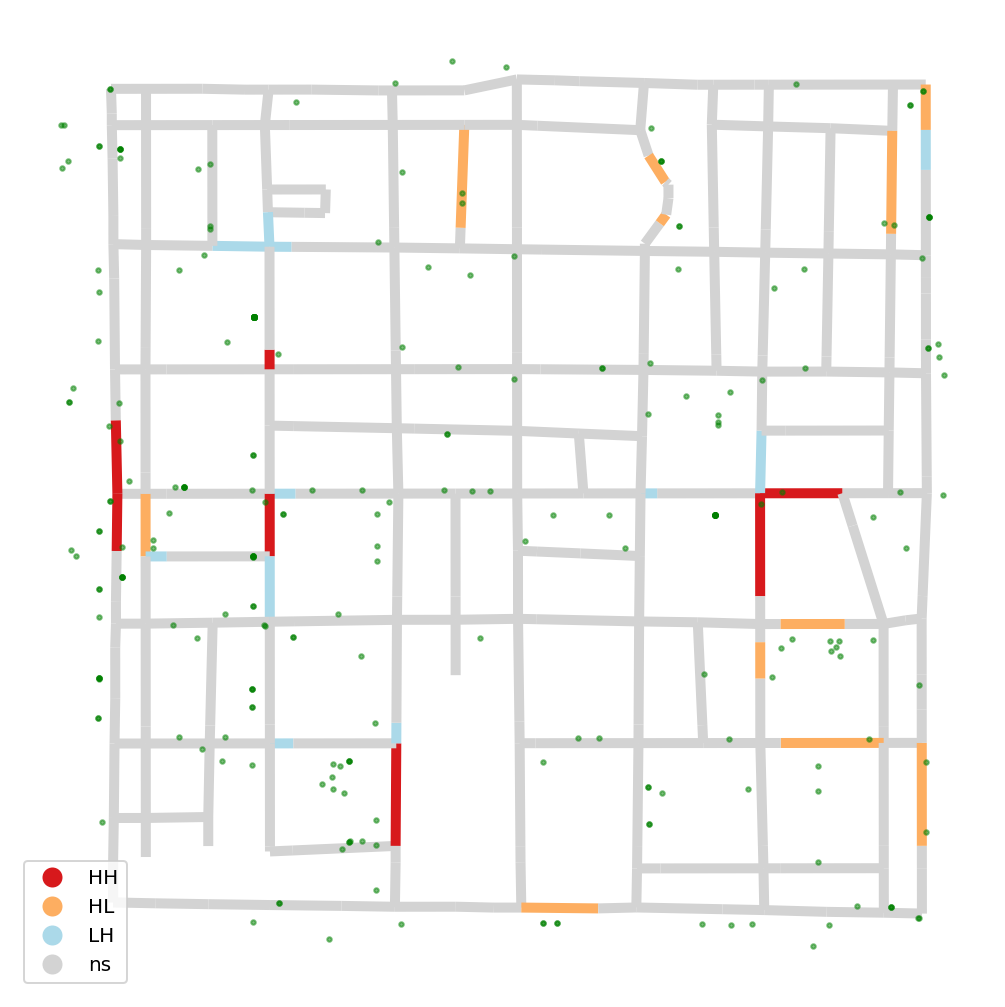

In [19]:
fig, ax = lisa_cluster(moran_loc_ntww, arc_df, p=0.05, figsize=(9,9), lw=5, zorder=0)
pp_df.plot(ax=ax, zorder=1, alpha=.5, color="g", markersize=5);

**Interpretation:**

* **....**


-----------------